In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pianoq.simulations.mplc.mplc_modes import get_speckle_modes_conf, get_spots_modes_conf
from pianoq.simulations.mplc.mplc_utils import get_lens_mask_conf
from pianoq.simulations.mplc.mplc import MPLC

In [ ]:
dist_after_plane = 87*np.ones(6)
dist_after_plane[4] = 138

# Lense in plane 9 between 7 and 11. Allow phases freedom in plane 11 since I measure intensity
active_planes = np.array([True] * 7)

N_N_modes = 1
# All in mm
conf = {'wavelength': 810e-6,  # mm
        'dist_after_plane': dist_after_plane,  # mm
        'active_planes': active_planes,  # bool
        'N_iterations': 30,
        'Nx': 140,  # Number of grid points x-axis
        'Ny': 180,  # Number of grid points y-axis
        'dx': 12.5e-3,  # mm - SLM pixel sizes
        'dy': 12.5e-3,  # mm
        'max_k_constraint': 0.15,  # Ohad: better than 0.1 or 0.2, but not very fine-tuned
        'N_modes': N_N_modes*N_N_modes,
        'min_log_level': 2,
        'size_factor': 3,  # assumed to be odd. Have physical larger grid than the actual SLM planes
        'use_mask_offset': True,
        }

mplc = MPLC(conf=conf)
input_modes = get_spots_modes_conf(conf, sig=0.1, N_rows=N_N_modes, N_cols=N_N_modes, spacing=0.6)
output_modes = get_speckle_modes_conf(conf, N_modes=len(input_modes),
                                      sig=0.25, diffuser_pix_size=0.05, active_slice=mplc.res.active_slice)
mplc.set_modes(input_modes, output_modes)
mplc.find_phases()

 57%|█████▋    | 17/30 [00:21<00:16,  1.26s/it]

In [4]:
mplc.res.saveto("C:\\temp\\4.mplc")

In [1]:
from pianoq.simulations.mplc.mplc_result import MPLCResult
res = MPLCResult()
res.loadfrom("C:\\temp\\4.mplc")

C:\code\pianoq\pianoq\simulations\mplc\mplc_result.py:98: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


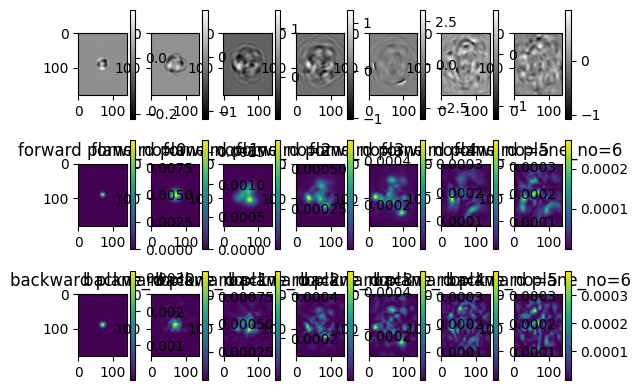

In [2]:
res.show_all(0)